In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_blobs

In [68]:
df = pd.read_csv('Clustering_gmm (2).csv')

In [69]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


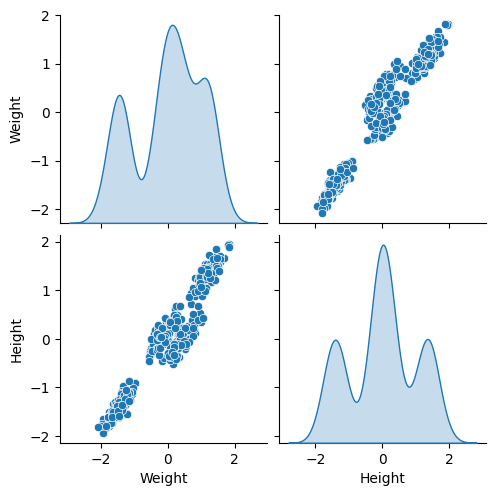

In [58]:
sns.pairplot(df, diag_kind='kde')

In [35]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

In [38]:
df.head()

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926


In [39]:
n_clusters = range(1, 11)
bic_scores = []
for n in n_clusters:
    GMM = GaussianMixture(n_components=n)
    GMM.fit(df)
    bic_scores.append(GMM.bic(df))

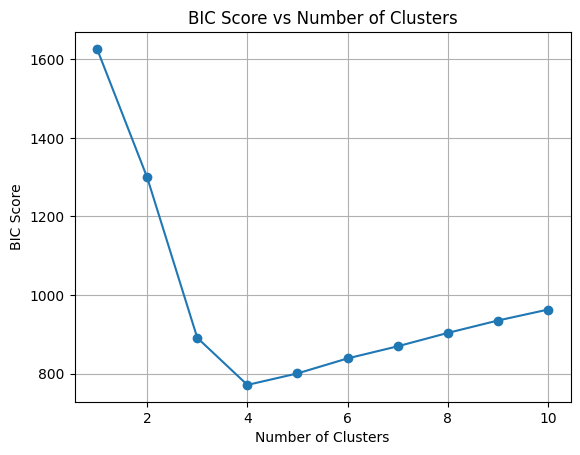

In [40]:
plt.plot(n_clusters, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Clusters')
plt.grid()
plt.show()

In [59]:
best_GMM = GaussianMixture(n_components=4)
best_GMM.fit(df)
GMM_pred = best_GMM.predict(df)

In [60]:
log_likelihood = best_GMM.score(df)
log_likelihood

-0.6281790919086254

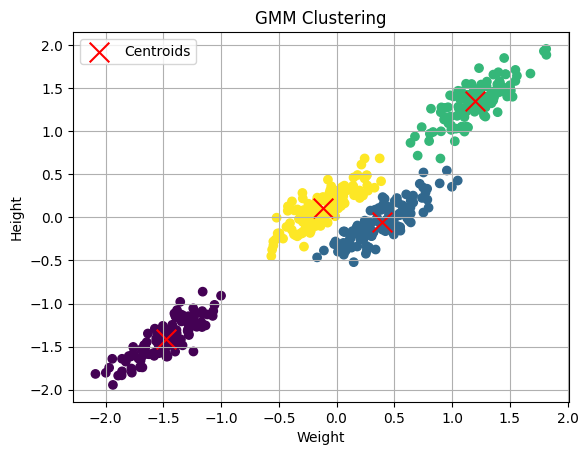

In [70]:
plt.scatter(df['Weight'], df['Height'], c=GMM_pred, cmap='viridis')
plt.scatter(best_GMM.means_[:, 0], best_GMM.means_[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('GMM Clustering')
plt.legend()
plt.grid()
plt.show()

In [71]:
best_GMM.predict_proba(df)

array([[1.14802920e-38, 1.28780867e-13, 9.99999976e-01, 2.36106367e-08],
       [4.27626405e-51, 5.04072773e-21, 1.00000000e+00, 1.62055772e-13],
       [1.14994502e-12, 2.76814151e-06, 2.96842817e-08, 9.99997202e-01],
       ...,
       [1.00000000e+00, 2.25494600e-13, 2.75464852e-39, 1.78769478e-13],
       [1.00000000e+00, 3.93495647e-22, 1.91695891e-50, 8.38224631e-18],
       [8.71697928e-11, 1.73588660e-06, 6.36614560e-10, 9.99998263e-01]])

In [73]:
best_GMM.predict(df)

array([2, 2, 3, 3, 2, 1, 1, 3, 3, 0, 1, 2, 1, 0, 3, 3, 2, 3, 0, 3, 3, 2,
       1, 0, 3, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 3, 0, 2, 0, 3, 3, 2,
       1, 2, 3, 3, 2, 2, 0, 0, 1, 3, 3, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1,
       3, 2, 3, 1, 0, 3, 0, 2, 0, 2, 1, 1, 3, 3, 0, 3, 0, 3, 3, 1, 0, 0,
       2, 0, 0, 0, 2, 0, 3, 3, 2, 2, 2, 3, 0, 0, 2, 0, 3, 3, 1, 2, 3, 0,
       0, 1, 0, 0, 2, 0, 2, 3, 1, 2, 3, 0, 2, 2, 0, 2, 2, 2, 2, 0, 3, 0,
       1, 0, 0, 0, 3, 2, 3, 1, 2, 2, 2, 2, 1, 0, 3, 3, 1, 0, 0, 2, 3, 3,
       3, 1, 1, 2, 1, 3, 2, 3, 2, 2, 1, 1, 2, 3, 0, 1, 2, 0, 2, 1, 3, 0,
       3, 0, 0, 0, 2, 2, 2, 3, 1, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 3, 1,
       3, 0, 0, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2, 2, 2, 3, 2, 1, 0, 0, 0,
       3, 2, 1, 0, 1, 2, 0, 3, 0, 1, 1, 1, 1, 1, 3, 3, 3, 1, 0, 2, 2, 1,
       1, 2, 0, 0, 3, 2, 3, 3, 3, 1, 2, 0, 3, 0, 0, 1, 0, 1, 3, 3, 2, 0,
       2, 2, 3, 3, 0, 2, 3, 0, 2, 1, 2, 0, 1, 1, 3, 2, 2, 3, 2, 1, 2, 1,
       1, 2, 3, 3, 3, 2, 0, 0, 2, 0, 0, 0, 3, 2, 2,